In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv("CLustering_Data.csv")
data_points=data.drop("Customer_Segment",axis=1)
data_points_unscaled=data.drop("Customer_Segment",axis=1)
data_points=(data_points-data_points.mean())/data_points.std()

In [3]:
def random_centeroids_initializer(k,data_points,random_state=42):
    return data_points.sample(n=k,random_state=random_state)

In [4]:
def cal_sq_dist(data_points, centroids):
    # Initialize total squared distance
    data_points=data_points.to_numpy()
    centroids=centroids.to_numpy()
    # Iterate over each data point
    distances = np.linalg.norm(data_points[:, np.newaxis] - centroids, axis=2) ** 2
    # Find the minimum squared distance for each data point
    min_squared_distances = np.min(distances, axis=1)
    # Sum up the minimum squared distances
    total_squared_distance = np.sum(min_squared_distances)
    
    return total_squared_distance


In [5]:
def Map_points_and_merge_with_data(centeroids,data_points):
    mapped_points=data_points.apply(lambda x: (((centeroids-x)**2).sum(axis=1).reset_index(drop=True)).idxmin(),axis=1)
    mapped_points=pd.DataFrame({"centeroid index":np.array(mapped_points)})
    return (mapped_points)

In [6]:
def updated_centers_by_cal_mean(data_points,mapped_points):
    #print(mapped_points.columns)
    data_concat=pd.concat([mapped_points,data_points],axis=1)
    #print(data_concat.columns)
    return data_concat.groupby("centeroid index").mean()#drop(columns="centeroid index")

In [7]:
max_k=11
centeroids_list_for_diff_k=[]
max_iter=10
inertia=[]

In [8]:
for k in range(1,max_k+1):
    centeroids=random_centeroids_initializer(k,data_points)
    for i in range(max_iter):
        mapped_points=Map_points_and_merge_with_data(centeroids,data_points)
        centeroids=updated_centers_by_cal_mean(data_points,mapped_points)
    centeroids_list_for_diff_k.append(centeroids)
    inertia.append(cal_sq_dist(data_points,centeroids))

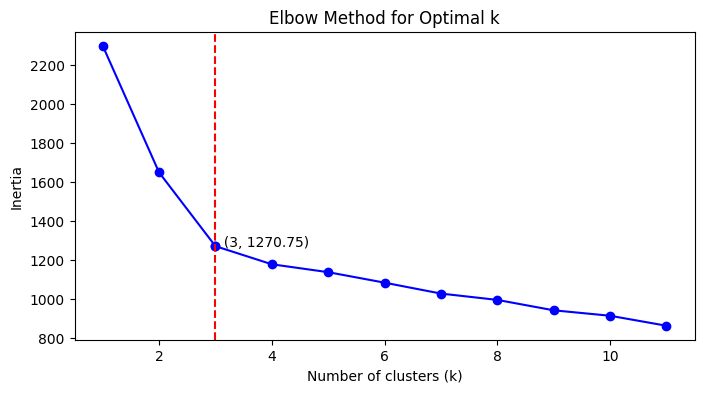

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(inertia) + 1), inertia, 'bo-')
plt.axvline(x=3, color='r', linestyle='--')
plt.scatter(3, inertia[2], color='b') 
plt.text(3, inertia[2], f'  (3, {inertia[2]:.2f})', color='black')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

The elbow method graph plots the sum of squared distances (inertia) against the number of clusters (k), showing how inertia decreases as k increases.
The "elbow point" on the graph is identified where the rate of decrease sharply slows down, forming an angle resembling an elbow.
This elbow point, which is 3 in this case, indicates the optimal number of clusters (k), balancing between having too many clusters (overfitting) and too few clusters (underfitting), typically around the point where further increases in k provide diminishing returns in inertia reduction.

In [10]:
K=3
centeroids=centeroids_list_for_diff_k[2]
mapped_points=Map_points_and_merge_with_data(centeroids,data_points)

In [11]:
%matplotlib widget
def visualize_clusters_3d(data, clusters, centroids):
    pca = PCA(n_components=3)
    data_3d = pca.fit_transform(data)
    centroids_3d = pca.transform(centroids)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'Iteration: ')
    clusters = clusters.values
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    
    scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=clusters)
    ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c="black", marker="x", s=100)

    custom_labels = [f"Cluster {i+1}" for i in range(len(clusters))]
    
    handles, _ = scatter.legend_elements()
    legend1 = ax.legend(handles, custom_labels, title="Clusters")
    plt.show()


Explained variance ratio: [0.36198848 0.1920749  0.11123631]


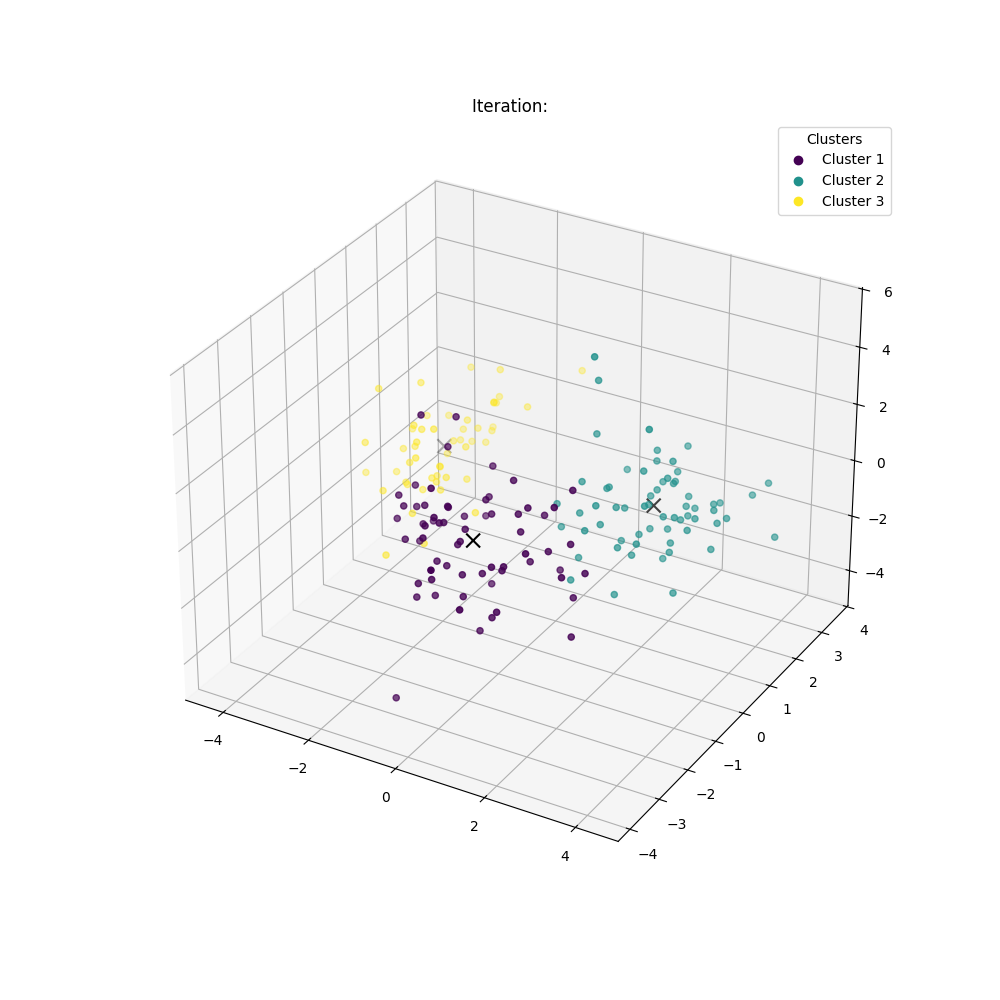

In [12]:
visualize_clusters_3d(data_points, mapped_points, centeroids)


In [13]:
centeroids.T

centeroid index,0,1,2
Alcohol,-0.923467,0.832883,0.164444
Malic_Acid,-0.392933,-0.302955,0.869095
Ash,-0.493126,0.363680,0.186373
Ash_Alcanity,0.170122,-0.608475,0.522892
Magnesium,-0.490329,0.575962,-0.075260
Total_Phenols,-0.075769,0.882747,-0.976575
Flavanoids,0.020754,0.975069,-1.211829
Nonflavanoid_Phenols,-0.033439,-0.560509,0.724021
Proanthocyanins,0.058102,0.578654,-0.777513
Color_Intensity,-0.899377,0.170582,0.938890


In [14]:
centeroids_unscaled=centeroids*data_points_unscaled.std()+data_points_unscaled.mean()

# Here is the unscaled version of Clusters

In [15]:
centeroids_unscaled.T

centeroid index,0,1,2
Alcohol,12.250923,13.676774,13.134118
Malic_Acid,1.897385,1.997903,3.307255
Ash,2.231231,2.466290,2.417647
Ash_Alcanity,20.063077,17.462903,21.241176
Magnesium,92.738462,107.967742,98.666667
Total_Phenols,2.247692,2.847581,1.683922
Flavanoids,2.050000,3.003226,0.818824
Nonflavanoid_Phenols,0.357692,0.292097,0.451961
Proanthocyanins,1.624154,1.922097,1.145882
Color_Intensity,2.973077,5.453548,7.234706


# Possiple representation of Clusters
## Cluster 1: 
Might represents light, balanced wines ideal for casual, everyday drinking due to their moderate alcohol, light color, and smooth profile.
## Cluster 2: 
Might represents premium, full-bodied wines with high alcohol, rich phenolic content, and intense color, suitable for special occasions and pairing with rich foods.
## Cluster 3: 
Might represents tart, bold, and visually intense wines with high acidity and lower phenolic richness, appealing to a niche audience seeking specific taste profiles.